# 05-circle-estimation-autograd

> Start point : [docs.pytorch.org - beginner - Learning PyTorch with Examples - Autograd](https://docs.pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-tensors-and-autograd) dealing with polynomial estimation of sin(x)

Estimate circle parameters using gradient descent with autograd feature from PyTorch.


Using cpu device
t=0: cx=-0.36937499046325684, cy=1.0989195108413696, r=-1.026599407196045, loss=158014.21875
t=1000: cx=1.6817455291748047, cy=2.7434518337249756, r=-2.652336597442627, loss=33913.59765625
t=2000: cx=1.9363113641738892, cy=2.9597456455230713, r=-4.307060718536377, loss=4427.70361328125
t=3000: cx=1.9792228937149048, cy=3.004925012588501, r=-4.8791584968566895, loss=450.01995849609375
t=4000: cx=1.9897109270095825, cy=3.0197036266326904, r=-4.9756903648376465, loss=326.02410888671875
t=5000: cx=1.99298095703125, cy=3.0251951217651367, r=-4.989217758178711, loss=323.1860046386719
t=6000: cx=1.994110345840454, cy=3.027256488800049, r=-4.991043567657471, loss=323.0819091796875
t=7000: cx=1.9945110082626343, cy=3.028026580810547, r=-4.99122428894043, loss=323.07281494140625
t=8000: cx=1.9946606159210205, cy=3.028320074081421, r=-4.99122428894043, loss=323.071533203125
t=9000: cx=1.9946906566619873, cy=3.028379440307617, r=-4.99122428894043, loss=323.0715637207031
Result: cx

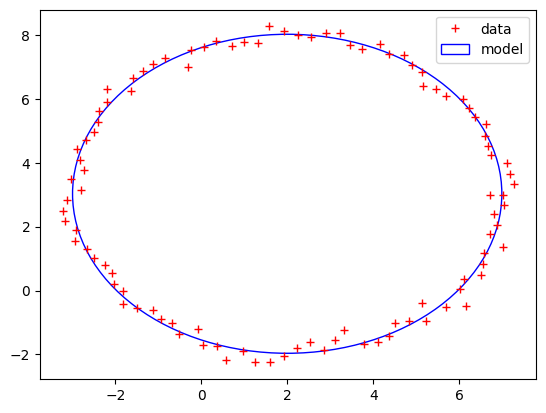

In [8]:
# -*- coding: utf-8 -*-
import torch
import math
import matplotlib.pyplot as plt

# Use GPU if available
dtype = torch.float
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
torch.set_default_device(device)

# Create N points on circle with cx=2, cy=3 and r=5
N=100
theta  = torch.linspace(0., 2.0 * math.pi, N, dtype=dtype)
radius = 5.0 + torch.randn(N) * 0.2
x = 2.0 + radius * torch.cos(theta)
y = 3.0 + radius * torch.sin(theta)

# Create scalar tensor for params tracking ops to compute grad 
cx = torch.randn((), dtype=dtype, requires_grad=True)
cy = torch.randn((), dtype=dtype, requires_grad=True)
r  = torch.randn((), dtype=dtype, requires_grad=True)

num_epoch=10000
learning_rate = 1e-7
for t in range(num_epoch):
    # Compute loss
    # Ek = y - cy * torch.ones(N)( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )^2
    loss = ( torch.square( x - cx ) + torch.square( y - cy ) - torch.square( r ) ).square().sum()
    if t % 1000 == 0:
        print(f't={t}: cx={cx.item()}, cy={cy.item()}, r={r.item()}, loss={loss.item()}')

    # Compute grad of cx, cy and r with respect to loss
    loss.backward();

    with torch.no_grad():
        # Update params
        cx -= learning_rate * cx.grad
        cy -= learning_rate * cy.grad
        r  -= learning_rate * r.grad

        cx.grad = None
        cy.grad = None
        r.grad = None

print(f'Result: cx={cx.item()}, cy={cy.item()}, r={r.item()}, loss={loss.item()}')
# Plot results
plt.plot(x, y, 'r+', label='data')
circle = plt.Circle((cx.item(), cy.item()), r.item(), color='b', fill=False, label='model')
plt.gcf().gca().add_artist(circle)
plt.legend()
plt.show()


